# Trabajo Final

## Twitter e Incendios Forestales en el sur de Chile

In [31]:
import pandas as pd 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

In [30]:
data = pd.read_csv('Data/mapuche.csv', sep=",", encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     1809 non-null   object
 1   target     1809 non-null   object
 2   weight     1809 non-null   int64 
 3   First_met  1809 non-null   object
 4   End_met    1809 non-null   object
 5   Label      1809 non-null   object
 6   Link       1809 non-null   object
dtypes: int64(1), object(6)
memory usage: 99.1+ KB


In [8]:
G = nx.Graph()
G = nx.from_pandas_edgelist(data, edge_attr='weight', create_using=G)

In [20]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  979
Número de enlaces:  1465
-------
Grado promedio (alternativa de calculo) 2.992849846782431
-------
Grado mínimo:  1
Grado máximo:  351


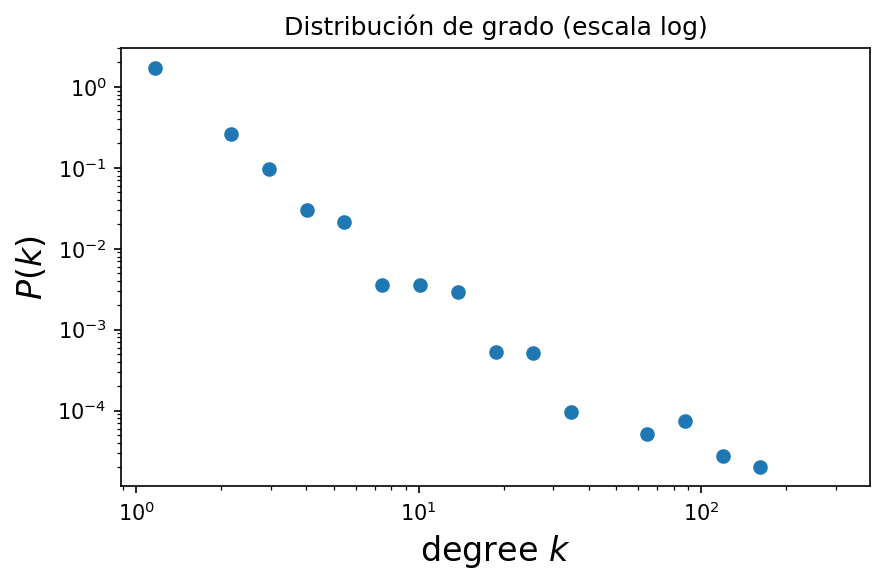

In [32]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de grado (escala log)')

plt.tight_layout()
plt.show()

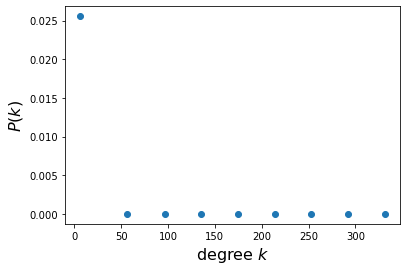

In [27]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


# Muestra la gráfica
plt.show()